In [1]:
import numpy as np
import scipy.stats as stats
from scipy import linalg as LA
from matplotlib import pyplot as plt
import matplotlib as mpl


def sample_mvn_from1D(Mu, Sigma, N):
    d = Sigma.shape[0]
    Z = np.random.normal(size=(N,d))
    L = LA.cholesky(Sigma, lower=True)
    X = L.dot(Z.T).T + Mu
    return X

def variance_along_axis(A, v):
    mean_point = np.mean(A, 0, keepdims=True)
    A_norm = A - mean_point
    P = v.dot(v.T) / (v.T.dot(v))
    PA = (P.dot(A_norm.T)).T
    var = np.mean(np.sum(PA**2, axis=1))
    return var

def PCA(A, n_components, out=False):
    mean_point = np.mean(A, 0, keepdims=True)
    A0 = A - mean_point
    C = A0.T.dot(A0)
    if out:
        print('Covariance matrix:\n{}'.format(C))
    l, v = LA.eig(C)
    l = l.real
    ids = np.argsort(-l)
    lambdas, principal_components = l[ids], v[:,ids]
    if out:
        print('\nEigenvalues & eigenvectors:'.format(n_components))
        for i, (l, v) in enumerate(list(zip(lambdas, principal_components))):
            print('l_{} = {:.2f}\tv_{} = {}'.format(i, l, i, v.flatten()))
    return principal_components[:,:n_components]

def visualize_set(Sigma):
    print('Visualization of the projections of some points \n\
of the set {x | (L^T x)^T L^T x = 1}.')
    print('Different colors correspond to different (2x2) parts of L:')
    LT = LA.cholesky(Sigma, lower=True).T
    LTinv = LA.inv(LT)
    N = 1000
    xs = (np.random.rand(N//2,1) - .5) * 2
    xs = np.vstack((xs, (1-np.random.rand(N//2,1) - .5) * 2))
    ys = np.sign((np.random.rand(N,1) - .5) * 2) * np.sqrt(1 - xs**2)
    Y = np.hstack((xs,ys))
    lmax, lmin = 0, 0
    for i in range(LT.shape[0]-1):
        X = (LTinv[i:i+2,i:i+2].dot(Y.T)).T
        visualize2D(X)
        lmax, lmin = max(np.max(X), lmax), min(np.min(X), lmin)
        plt.xlim(lmin,lmax)
        plt.ylim(lmin,lmax)
    
def visualize2D(A, cmap='blue'):
    A = A.reshape((-1,2))
    plt.scatter(A[:,0], A[:,1])
    lmax, lmin = np.max(A), np.min(A)
    plt.xlim(lmin,lmax)
    plt.ylim(lmin,lmax)

Visualization of the projections of some points 
of the set {x | (L^T x)^T L^T x = 1}.
Different colors correspond to different (2x2) parts of L:


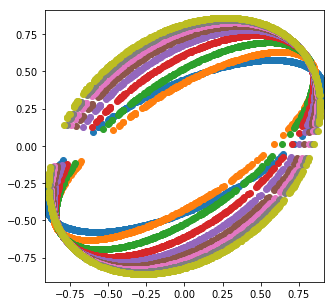

Covariance matrix:
[[  214.78971657  -201.24955179   300.72160209  -385.72372796
    529.6520468   -611.37256151   705.68227067  -785.75569745
    868.94607174  -991.48615739]
 [ -201.24955179   537.03948453  -657.00300317   820.12962187
  -1089.48325768  1274.24170173 -1454.40059324  1647.7134575
  -1849.45677325  2036.21055661]
 [  300.72160209  -657.00300317  1076.20879342 -1180.01687008
   1598.14637295 -1870.08046825  2176.96746085 -2470.6720384
   2749.01159692 -3057.06573498]
 [ -385.72372796   820.12962187 -1180.01687008  1607.81048663
  -2000.03664061  2361.37559348 -2731.42892245  3069.48603077
  -3451.32196591  3853.66346444]
 [  529.6520468  -1089.48325768  1598.14637295 -2000.03664061
   2767.26495399 -3141.47549752  3655.56988208 -4090.77292491
   4620.36946533 -5128.81104216]
 [ -611.37256151  1274.24170173 -1870.08046825  2361.37559348
  -3141.47549752  3791.3181555  -4296.12885672  4837.60632513
  -5445.56903835  6042.94906325]
 [  705.68227067 -1454.40059324  2176.967

In [2]:
mpl.rcParams['figure.figsize'] = (5,5)
N = 100
d = 10
Mu = np.zeros(d)
u = np.array([(-1)**i*(i+1) for i in range(10)]).reshape(-1,1)
Sigma = np.eye(d)+u.dot(u.T)
visualize_set(Sigma)
plt.show()
A = sample_mvn_from1D(Mu, Sigma, N)
n_components = 5
total_variance = np.sum(np.var(A, 0))
pc = PCA(A, n_components, out=True)
print()
for i in range(n_components):
    v = pc[:,i].reshape(-1,1)
    variance = variance_along_axis(A, v)
    fraction = variance / total_variance * 100
    print('{} principal component:'.format(i+1, v.flatten()))
    print('\tVariance along the component: {:.2f}'.format(variance))
    print('\tThe fraction of the total variance: {:.2f} / {:.2f} = {:.2f}%'.format(variance, total_variance, fraction))

Visualization of the projections of some points 
of the set {x | (L^T x)^T L^T x = 1}.
Different colors correspond to different (2x2) parts of L:


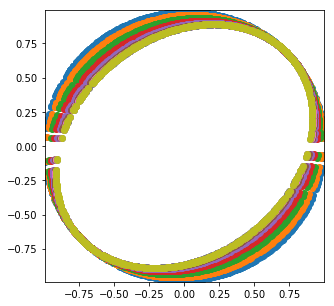


1 principal component:
	Variance along the component: 4.32
	The fraction of the total variance: 4.32 / 12.61 = 34.24%
2 principal component:
	Variance along the component: 1.37
	The fraction of the total variance: 1.37 / 12.61 = 10.84%
3 principal component:
	Variance along the component: 1.17
	The fraction of the total variance: 1.17 / 12.61 = 9.29%
4 principal component:
	Variance along the component: 1.13
	The fraction of the total variance: 1.13 / 12.61 = 8.92%
5 principal component:
	Variance along the component: 0.97
	The fraction of the total variance: 0.97 / 12.61 = 7.66%


In [3]:
mpl.rcParams['figure.figsize'] = (5,5)
N = 100
d = 10
Mu = np.zeros(d)
u = np.array([(-1)**i*(i+1) for i in range(10)]).reshape(-1,1)
Sigma = np.eye(d)+u.dot(u.T) / 100
visualize_set(Sigma)
plt.show()
A = sample_mvn_from1D(Mu, Sigma, N)
n_components = 5
total_variance = np.sum(np.var(A, 0))
pc = PCA(A, n_components, out=False)
print()
for i in range(n_components):
    v = pc[:,i].reshape(-1,1)
    variance = variance_along_axis(A, v)
    fraction = variance / total_variance * 100
    print('{} principal component:'.format(i+1, v.flatten()))
    print('\tVariance along the component: {:.2f}'.format(variance))
    print('\tThe fraction of the total variance: {:.2f} / {:.2f} = {:.2f}%'.format(variance, total_variance, fraction))

Visualization of the projections of some points 
of the set {x | (L^T x)^T L^T x = 1}.
Different colors correspond to different (2x2) parts of L:


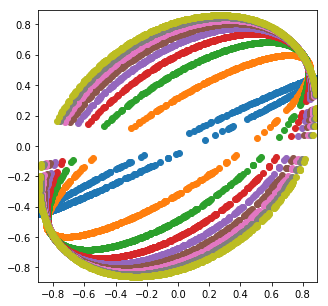


1 principal component:
	Variance along the component: 38779.78
	The fraction of the total variance: 38779.78 / 38788.46 = 99.98%
2 principal component:
	Variance along the component: 1.44
	The fraction of the total variance: 1.44 / 38788.46 = 0.00%
3 principal component:
	Variance along the component: 1.32
	The fraction of the total variance: 1.32 / 38788.46 = 0.00%
4 principal component:
	Variance along the component: 1.22
	The fraction of the total variance: 1.22 / 38788.46 = 0.00%
5 principal component:
	Variance along the component: 1.00
	The fraction of the total variance: 1.00 / 38788.46 = 0.00%


In [4]:
mpl.rcParams['figure.figsize'] = (5,5)
N = 100
d = 10
Mu = np.zeros(d)
u = np.array([(-1)**i*(i+1) for i in range(10)]).reshape(-1,1)
Sigma = np.eye(d)+u.dot(u.T) * 100
visualize_set(Sigma)
plt.show()
A = sample_mvn_from1D(Mu, Sigma, N)
n_components = 5
total_variance = np.sum(np.var(A, 0))
pc = PCA(A, n_components, out=False)
print()
for i in range(n_components):
    v = pc[:,i].reshape(-1,1)
    variance = variance_along_axis(A, v)
    fraction = variance / total_variance * 100
    print('{} principal component:'.format(i+1, v.flatten()))
    print('\tVariance along the component: {:.2f}'.format(variance))
    print('\tThe fraction of the total variance: {:.2f} / {:.2f} = {:.2f}%'.format(variance, total_variance, fraction))